In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("Vadodara.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,PRECTOTCORR,WS50M,RH2M,PS
0,2011,4,1,5,19.44,0.0,3.78,68.06,100.47
1,2011,4,1,6,20.31,0.0,2.76,68.19,100.55
2,2011,4,1,7,22.99,0.0,2.59,62.62,100.62
3,2011,4,1,8,26.46,0.0,2.73,52.69,100.67
4,2011,4,1,9,30.25,0.0,2.46,39.56,100.67
...,...,...,...,...,...,...,...,...,...
87667,2021,4,1,0,26.18,0.0,6.70,46.12,99.93
87668,2021,4,1,1,25.08,0.0,6.53,48.12,99.90
87669,2021,4,1,2,23.98,0.0,6.20,49.62,99.88
87670,2021,4,1,3,22.80,0.0,5.53,52.38,99.87


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
PRECTOTCORR    0.0
WS50M          0.0
RH2M           0.0
PS             0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'PRECTOTCORR', 'WS50M', 'RH2M', 'PS']


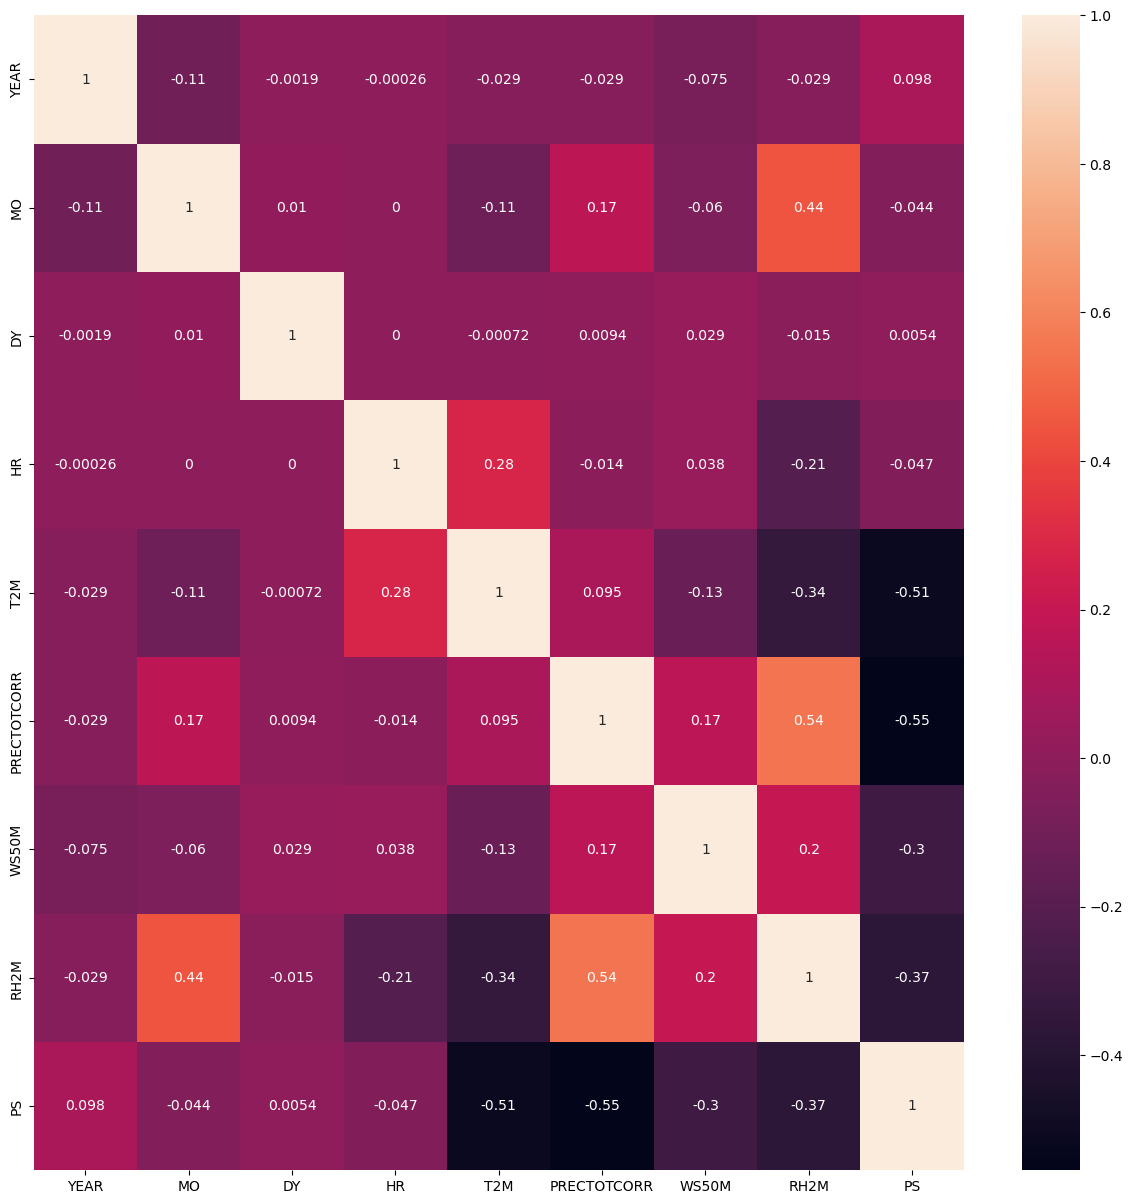

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

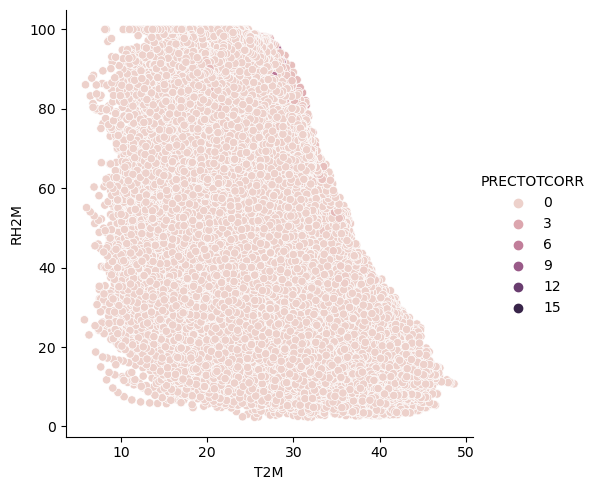

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


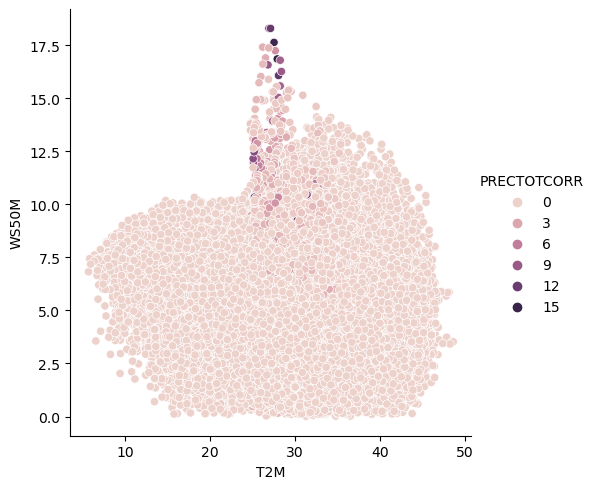

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


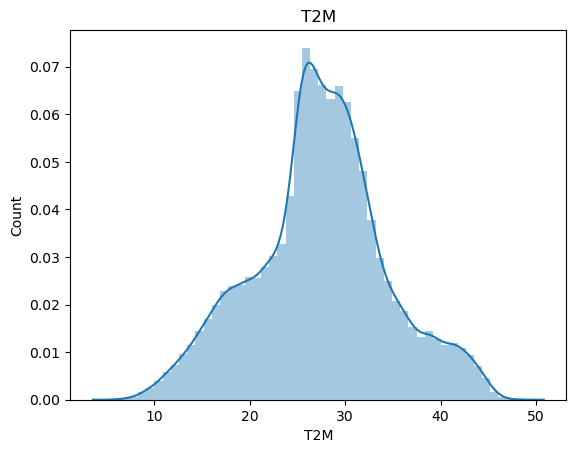

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


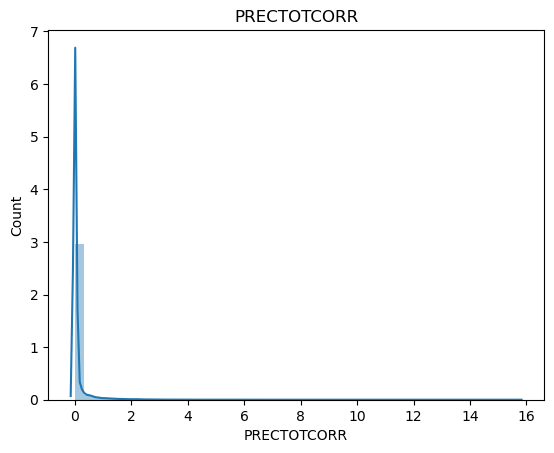

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


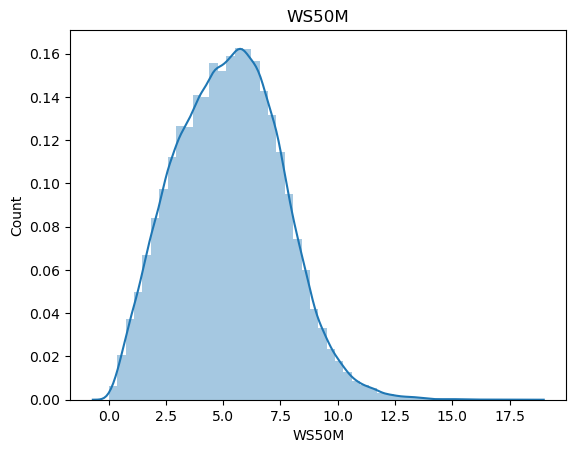

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


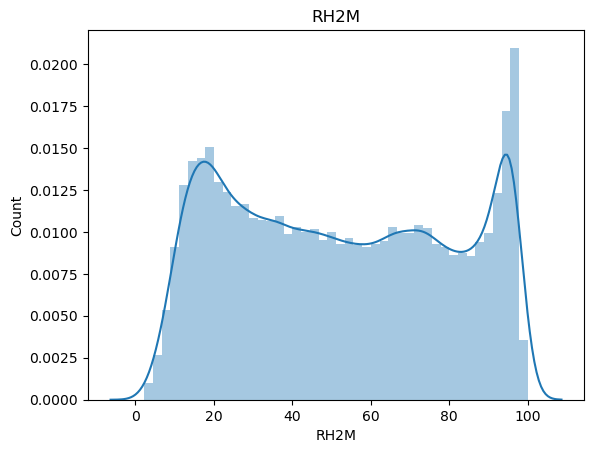

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


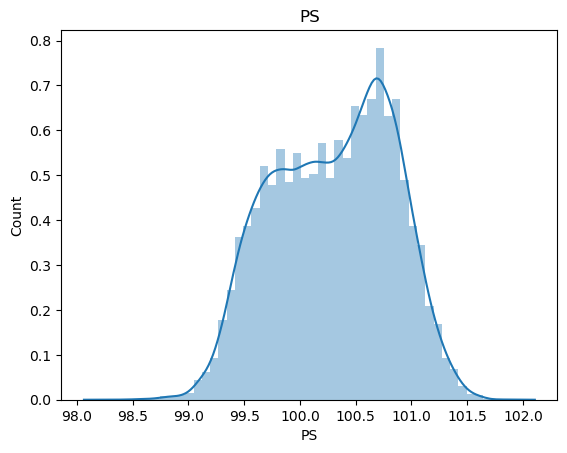

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

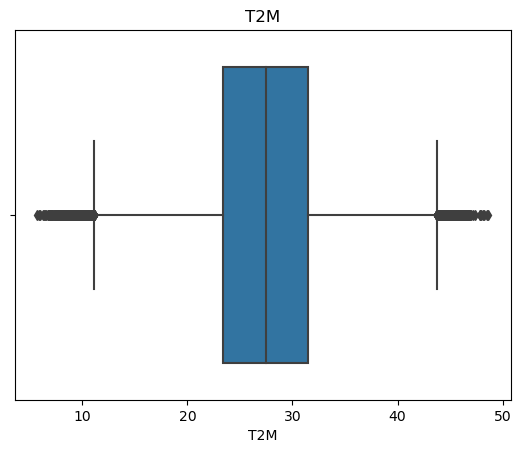

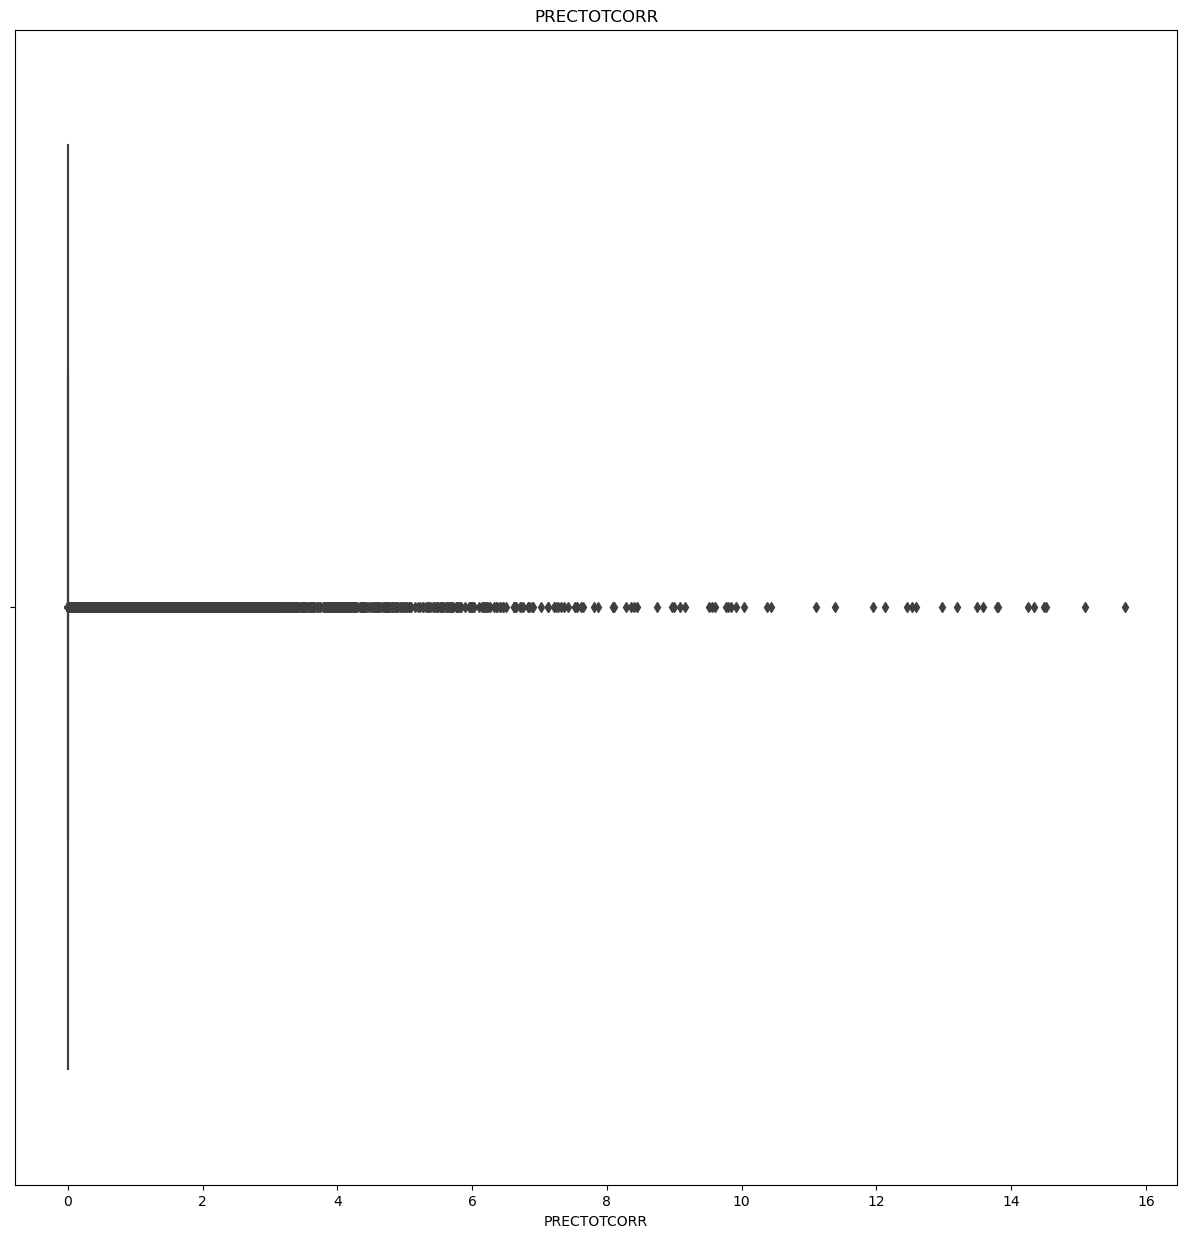

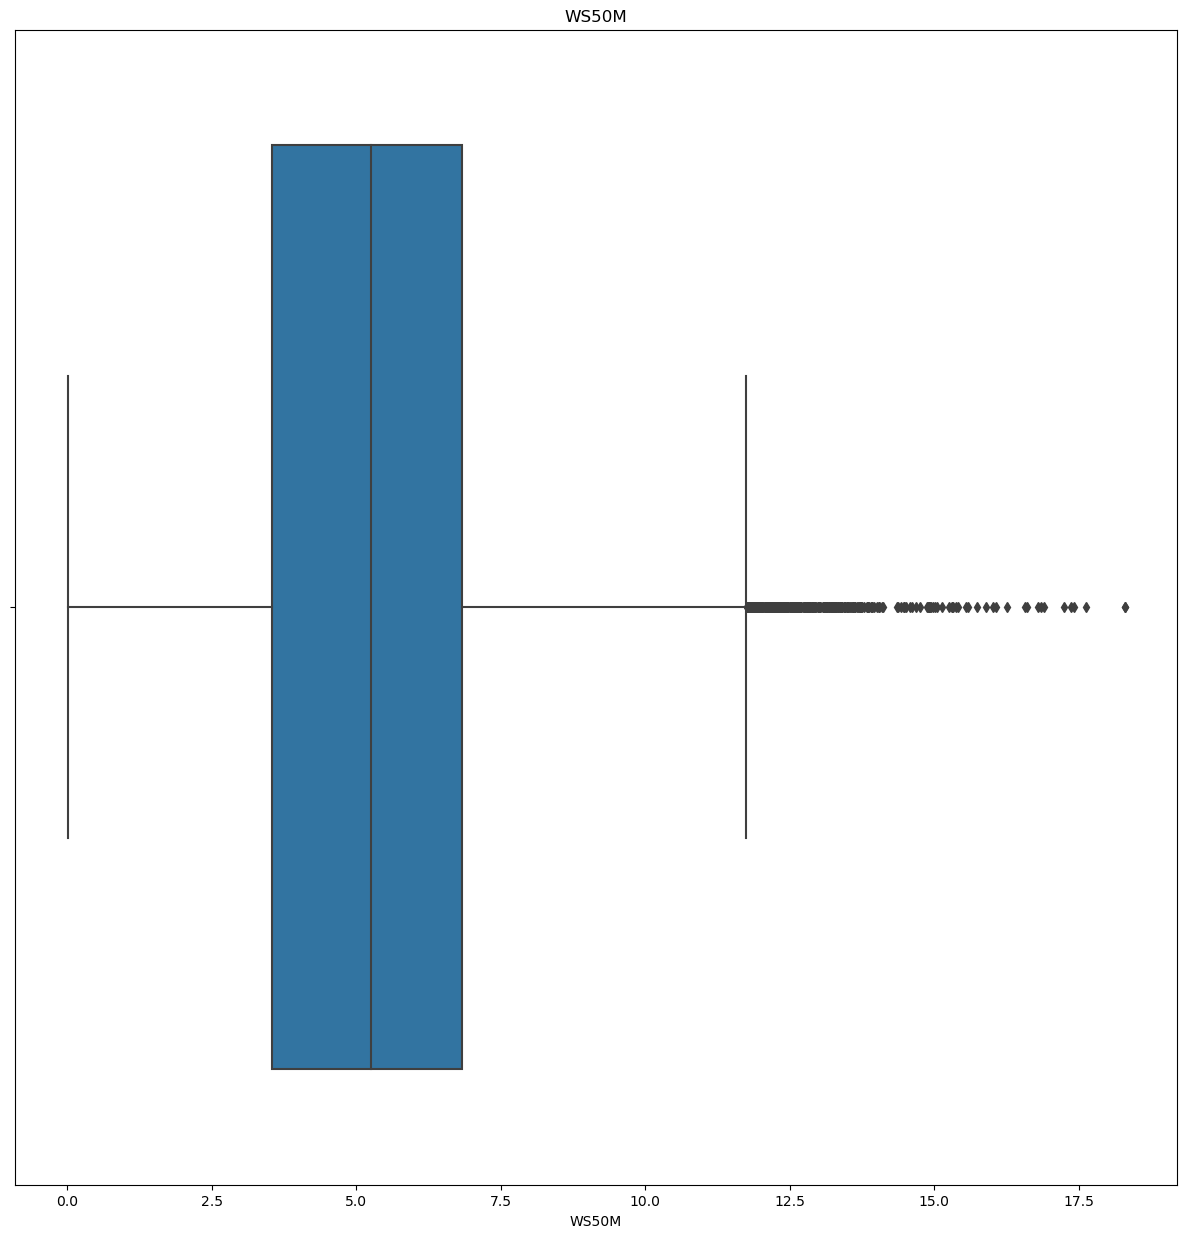

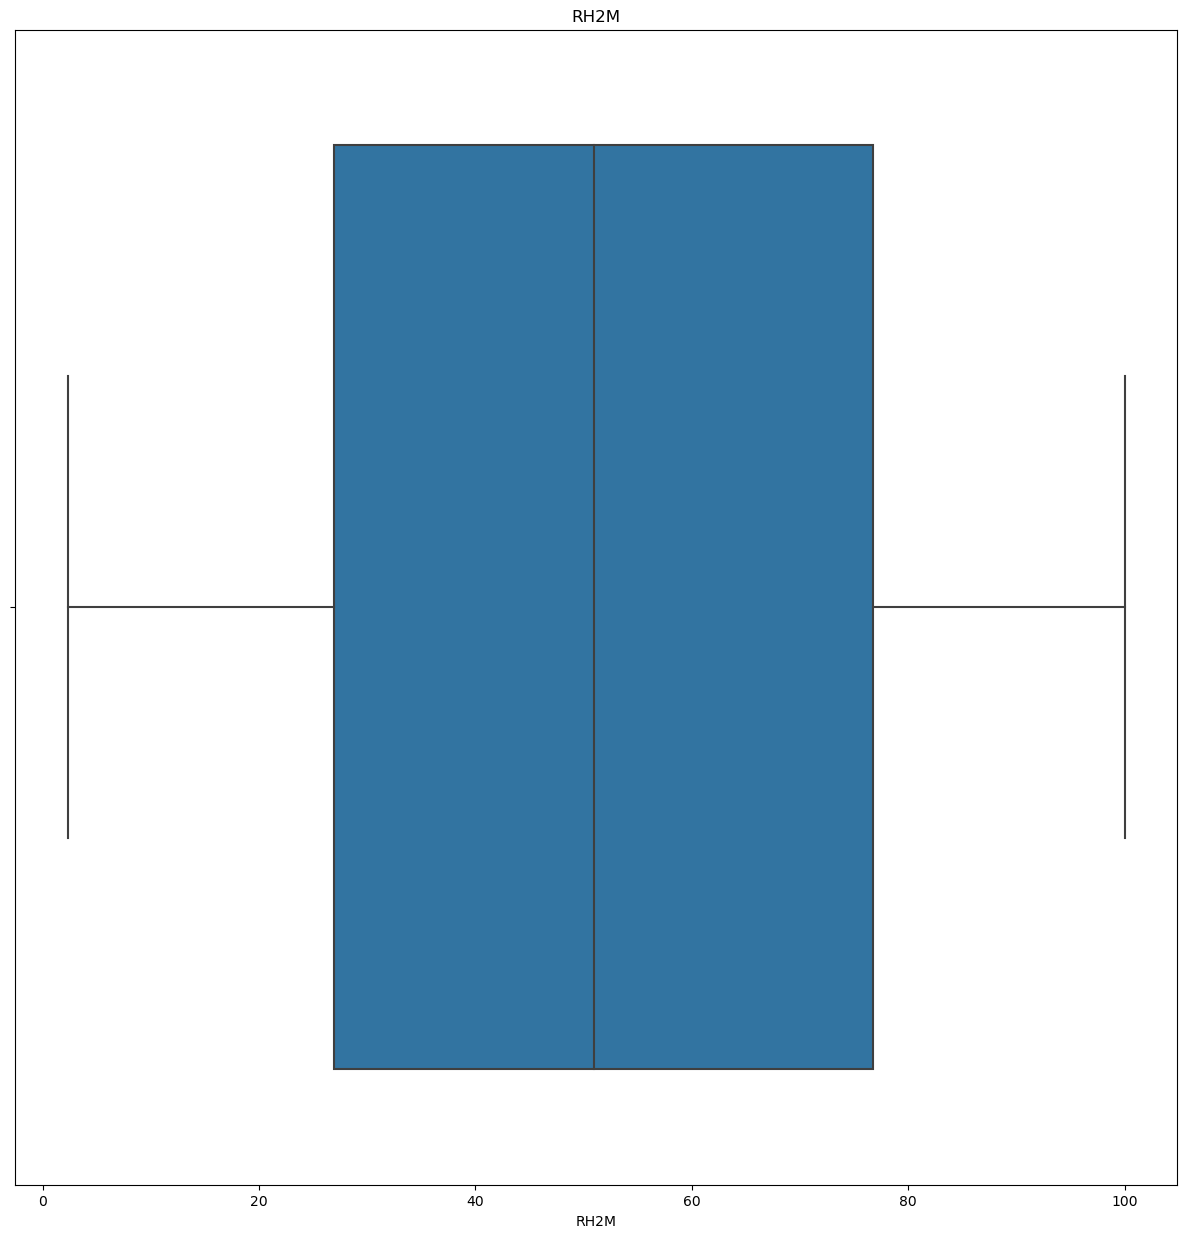

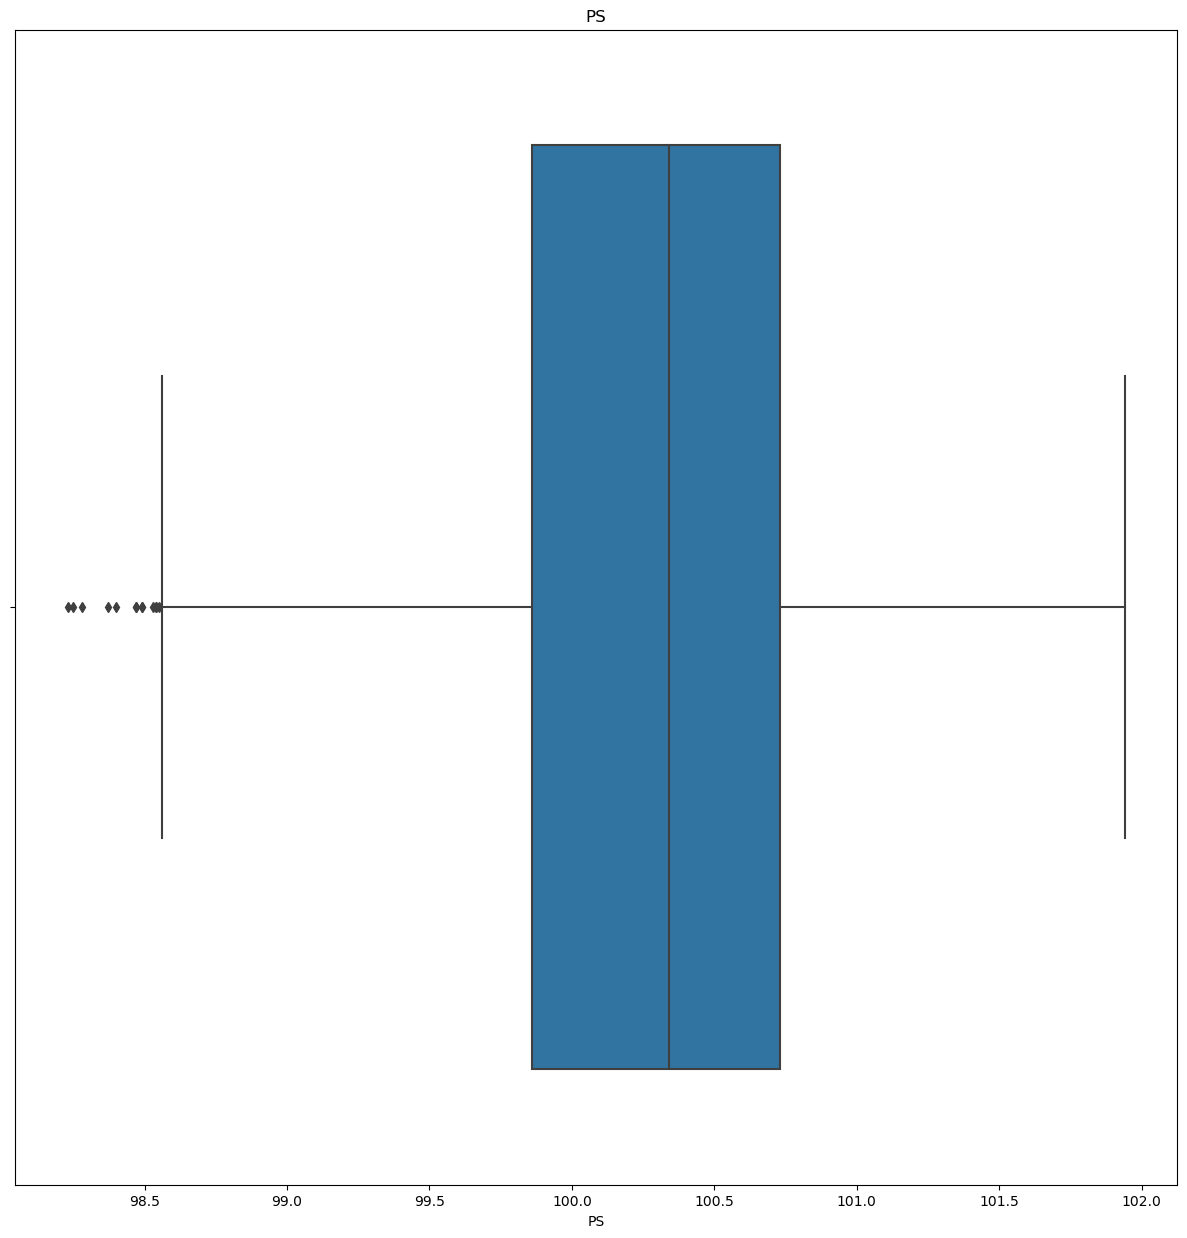

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[19.44 20.31 22.99 ...  8.71  8.14  9.21]
<class 'numpy.ndarray'>
[0.000e+00 1.000e-02 1.930e+00 3.140e+00 2.270e+00 1.340e+00 6.700e-01
 4.400e-01 2.200e-01 1.900e-01 1.400e-01 4.000e-02 8.000e-02 1.200e-01
 1.600e-01 1.700e-01 2.300e-01 2.900e-01 2.000e-02 9.000e-02 6.000e-02
 1.000e-01 3.000e-02 1.500e-01 7.000e-02 1.100e-01 5.300e-01 7.000e-01
 2.700e-01 4.800e-01 6.100e-01 4.500e-01 2.100e-01 2.500e-01 2.400e-01
 2.800e-01 5.800e-01 5.000e-02 1.300e-01 2.000e-01 2.600e-01 1.800e-01
 1.620e+00 2.280e+00 3.520e+00 4.950e+00 6.270e+00 6.140e+00 5.550e+00
 4.810e+00 4.120e+00 3.830e+00 3.890e+00 3.170e+00 2.030e+00 1.130e+00
 6.400e-01 3.900e-01 3.000e-01 4.100e-01 5.200e-01 6.300e-01 8.900e-01
 4.900e-01 5.400e-01 7.800e-01 1.000e+00 1.230e+00 1.190e+00 1.100e+00
 9.700e-01 8.100e-01 3.700e-01 7.300e-01 1.030e+00 1.330e+00 1.580e+00
 1.710e+00 1.690e+00 1.550e+00 1.510e+00 1.480e+00 4.000e-01 4.200e-01
 4.600e-01 5.500e-01 5.900e-01 6.800e-01 6.500e-01 7.600e-01 6.200e-01
 4.700e-01 

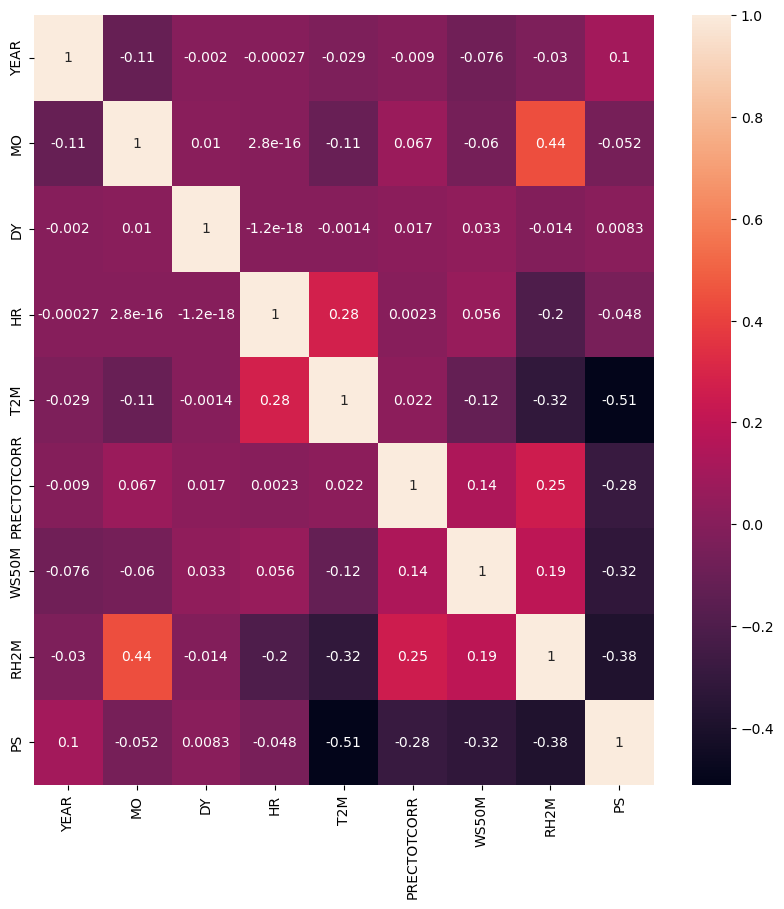

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


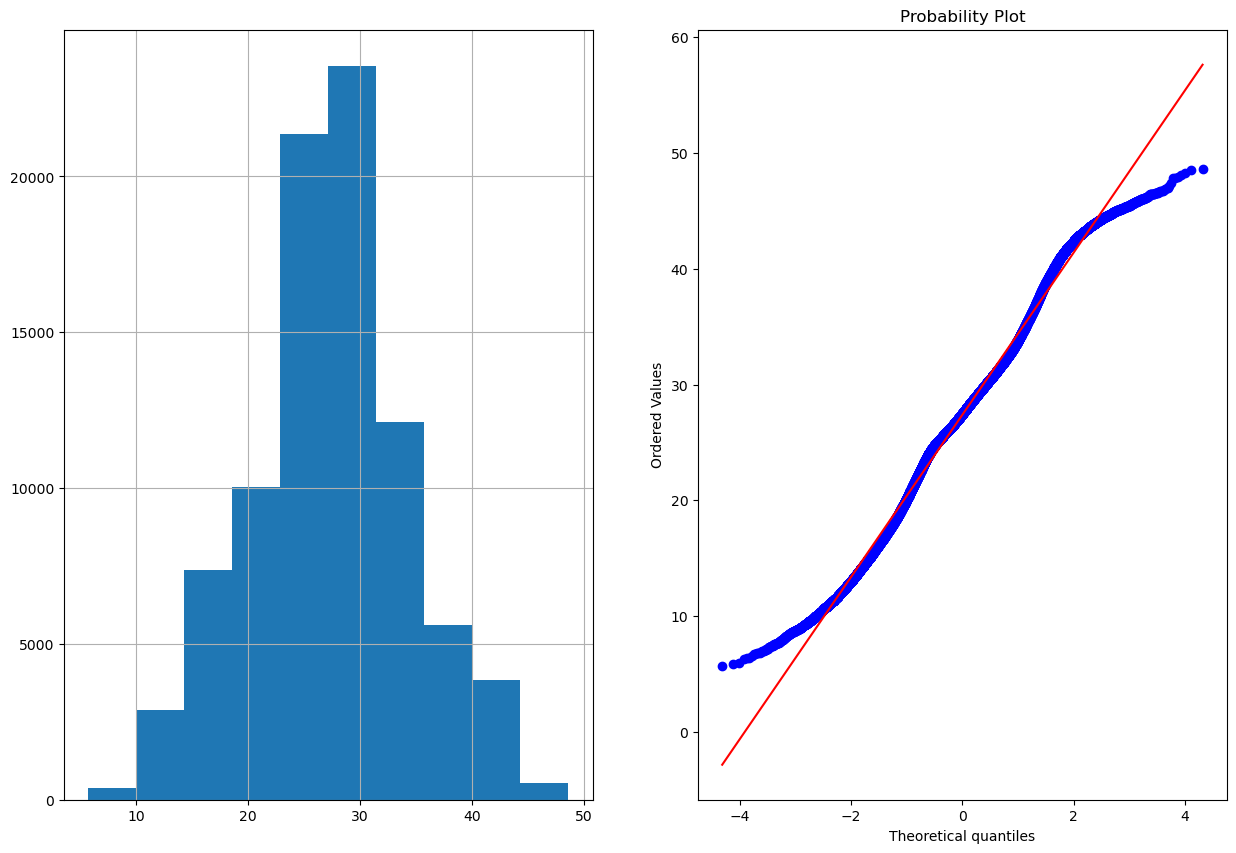

PRECTOTCORR


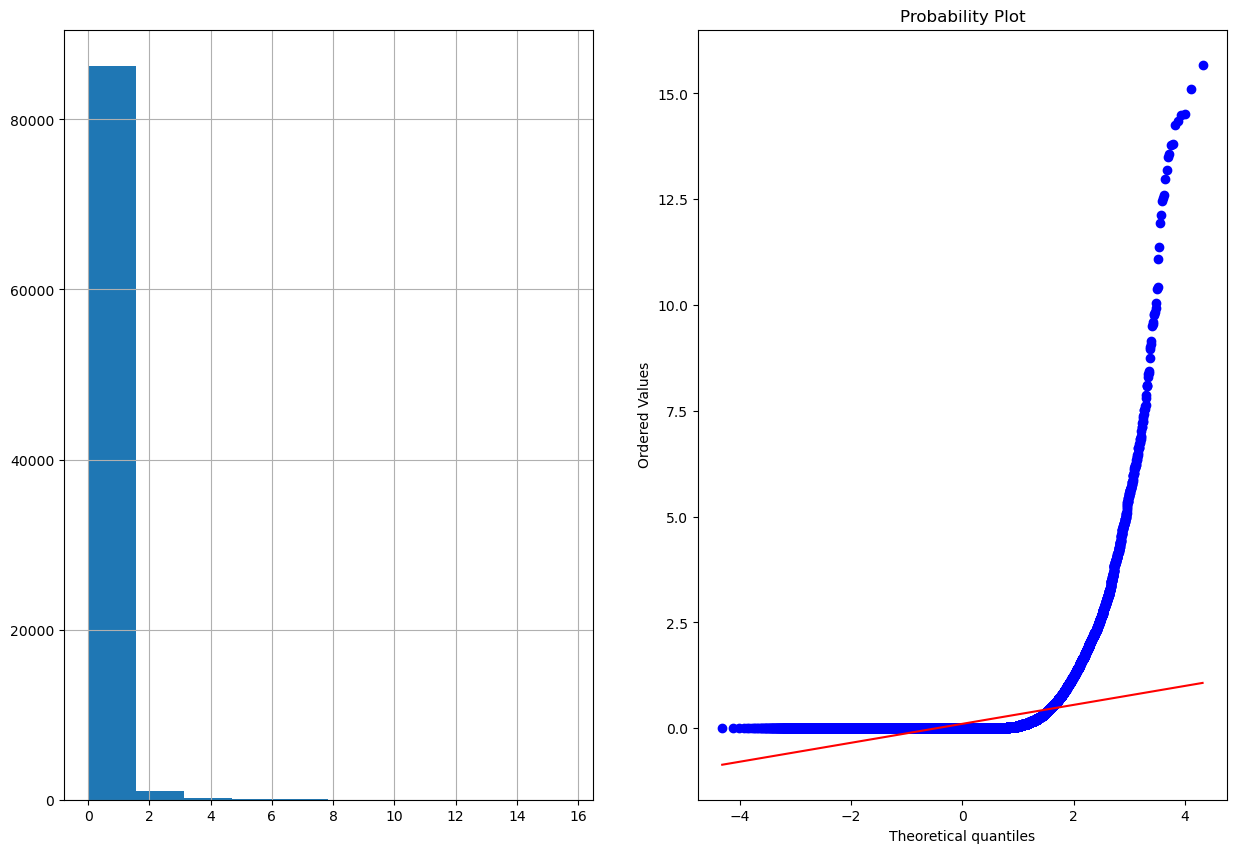

WS50M


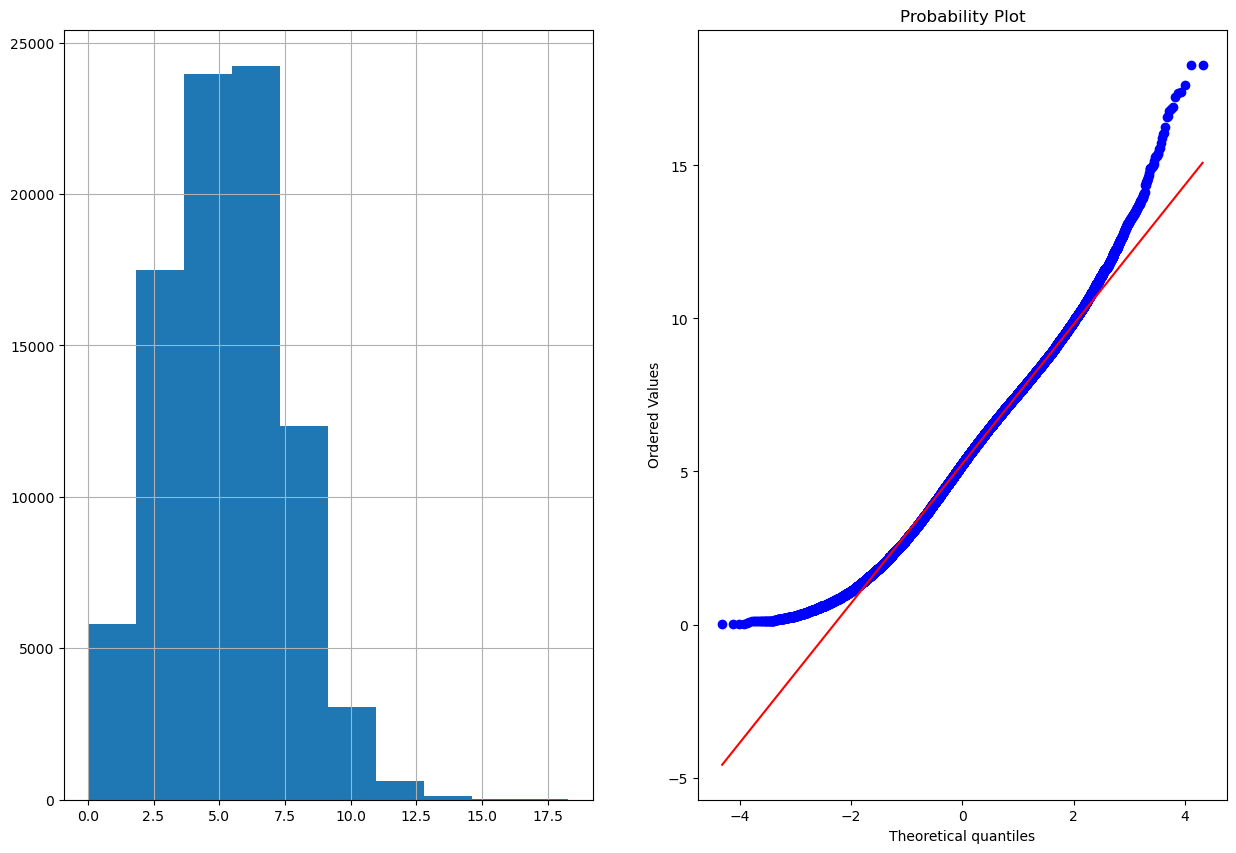

RH2M


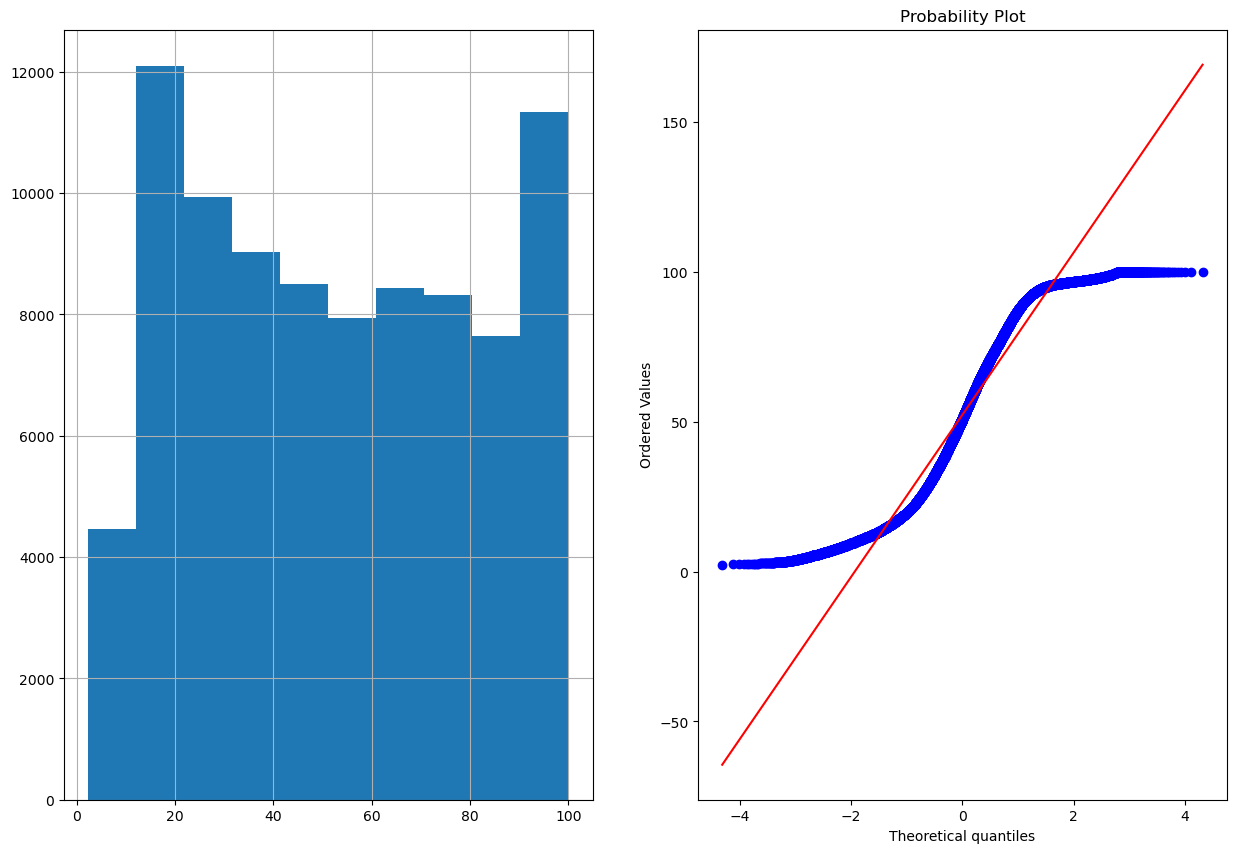

PS


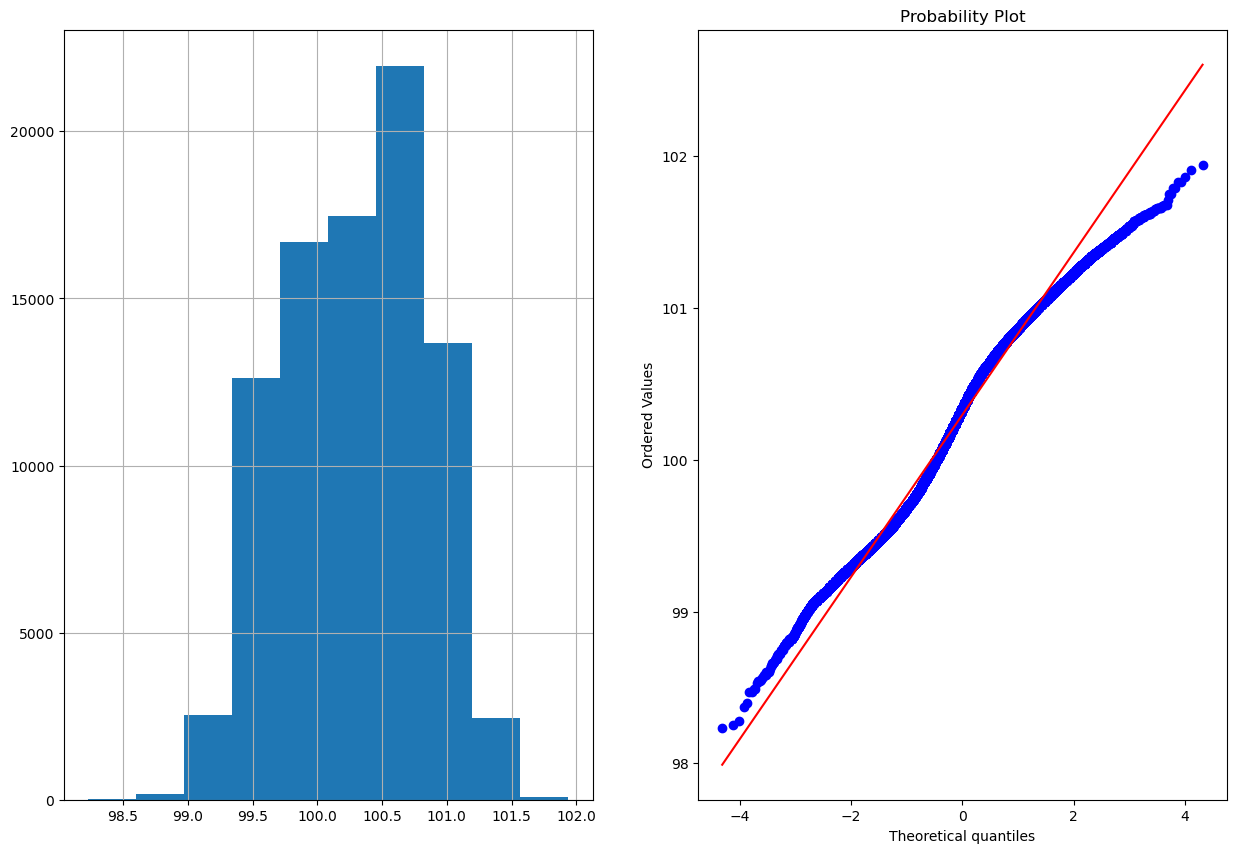

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.000e+00, 1.000e-02, 1.930e+00, 3.140e+00, 2.270e+00, 1.340e+00,
       6.700e-01, 4.400e-01, 2.200e-01, 1.900e-01, 1.400e-01, 4.000e-02,
       8.000e-02, 1.200e-01, 1.600e-01, 1.700e-01, 2.300e-01, 2.900e-01,
       2.000e-02, 9.000e-02, 6.000e-02, 1.000e-01, 3.000e-02, 1.500e-01,
       7.000e-02, 1.100e-01, 5.300e-01, 7.000e-01, 2.700e-01, 4.800e-01,
       6.100e-01, 4.500e-01, 2.100e-01, 2.500e-01, 2.400e-01, 2.800e-01,
       5.800e-01, 5.000e-02, 1.300e-01, 2.000e-01, 2.600e-01, 1.800e-01,
       1.620e+00, 2.280e+00, 3.520e+00, 4.950e+00, 6.270e+00, 6.140e+00,
       5.550e+00, 4.810e+00, 4.120e+00, 3.830e+00, 3.890e+00, 3.170e+00,
       2.030e+00, 1.130e+00, 6.400e-01, 3.900e-01, 3.000e-01, 4.100e-01,
       5.200e-01, 6.300e-01, 8.900e-01, 4.900e-01, 5.400e-01, 7.800e-01,
       1.000e+00, 1.230e+00, 1.190e+00, 1.100e+00, 9.700e-01, 8.100e-01,
       3.700e-01, 7.300e-01, 1.030e+00, 1.330e+00, 1.580e+00, 1.710e+00,
       1.690e+00, 1.550e+00, 1.510e+00, 1.480e+00, 

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,19.44,1.0
1,20.31,1.0
2,22.99,1.0
3,26.46,1.0
4,30.25,1.0
...,...,...
87667,26.18,1.0
87668,25.08,1.0
87669,23.98,1.0
87670,22.80,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,19.44,1.0,5
1,20.31,1.0,6
2,22.99,1.0,7
3,26.46,1.0,8
4,30.25,1.0,9
...,...,...,...
87667,26.18,1.0,0
87668,25.08,1.0,1
87669,23.98,1.0,2
87670,22.80,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,19.44,1.0,5,1
1,20.31,1.0,6,1
2,22.99,1.0,7,1
3,26.46,1.0,8,1
4,30.25,1.0,9,1
...,...,...,...,...
87667,26.18,1.0,0,1
87668,25.08,1.0,1,1
87669,23.98,1.0,2,1
87670,22.80,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,19.44,1.0,5,1,4
1,20.31,1.0,6,1,4
2,22.99,1.0,7,1,4
3,26.46,1.0,8,1,4
4,30.25,1.0,9,1,4
...,...,...,...,...,...
87667,26.18,1.0,0,1,4
87668,25.08,1.0,1,1,4
87669,23.98,1.0,2,1,4
87670,22.80,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,19.44,1.0,5,1,4,2011
1,20.31,1.0,6,1,4,2011
2,22.99,1.0,7,1,4,2011
3,26.46,1.0,8,1,4,2011
4,30.25,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,26.18,1.0,0,1,4,2021
87668,25.08,1.0,1,1,4,2021
87669,23.98,1.0,2,1,4,2021
87670,22.80,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,19.44,1.0,5,1,4,2011
1,20.31,1.0,6,1,4,2011
2,22.99,1.0,7,1,4,2011
3,26.46,1.0,8,1,4,2011
4,30.25,1.0,9,1,4,2011
...,...,...,...,...,...,...
87667,26.18,1.0,0,1,4,2021
87668,25.08,1.0,1,1,4,2021
87669,23.98,1.0,2,1,4,2021
87670,22.80,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,19.44,1.0,5,1,4,2011,68.06
1,20.31,1.0,6,1,4,2011,68.19
2,22.99,1.0,7,1,4,2011,62.62
3,26.46,1.0,8,1,4,2011,52.69
4,30.25,1.0,9,1,4,2011,39.56
...,...,...,...,...,...,...,...
87667,26.18,1.0,0,1,4,2021,46.12
87668,25.08,1.0,1,1,4,2021,48.12
87669,23.98,1.0,2,1,4,2021,49.62
87670,22.80,1.0,3,1,4,2021,52.38


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,19.44,1.0,5,1,4,2011,68.06,3.78
1,20.31,1.0,6,1,4,2011,68.19,2.76
2,22.99,1.0,7,1,4,2011,62.62,2.59
3,26.46,1.0,8,1,4,2011,52.69,2.73
4,30.25,1.0,9,1,4,2011,39.56,2.46
...,...,...,...,...,...,...,...,...
87667,26.18,1.0,0,1,4,2021,46.12,6.70
87668,25.08,1.0,1,1,4,2021,48.12,6.53
87669,23.98,1.0,2,1,4,2021,49.62,6.20
87670,22.80,1.0,3,1,4,2021,52.38,5.53


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,19.44,1.0,5,1,4,2011,68.06,3.78,3.78
1,20.31,1.0,6,1,4,2011,68.19,2.76,2.76
2,22.99,1.0,7,1,4,2011,62.62,2.59,2.59
3,26.46,1.0,8,1,4,2011,52.69,2.73,2.73
4,30.25,1.0,9,1,4,2011,39.56,2.46,2.46
...,...,...,...,...,...,...,...,...,...
87667,26.18,1.0,0,1,4,2021,46.12,6.70,6.70
87668,25.08,1.0,1,1,4,2021,48.12,6.53,6.53
87669,23.98,1.0,2,1,4,2021,49.62,6.20,6.20
87670,22.80,1.0,3,1,4,2021,52.38,5.53,5.53


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

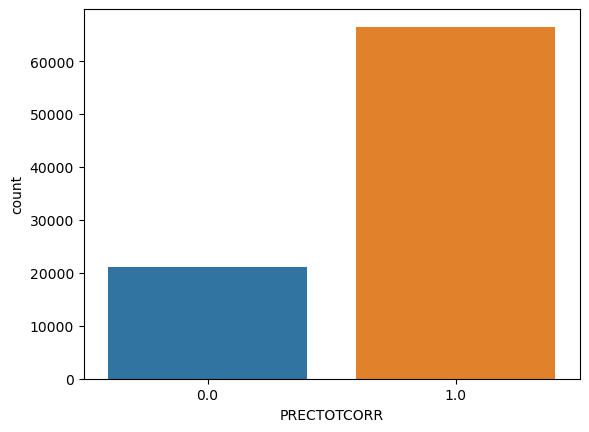

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("Vadodara-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,19.44,1.0,5,1,4,2011,68.06,3.78,3.78
1,20.31,1.0,6,1,4,2011,68.19,2.76,2.76
2,22.99,1.0,7,1,4,2011,62.62,2.59,2.59
3,26.46,1.0,8,1,4,2011,52.69,2.73,2.73
4,30.25,1.0,9,1,4,2011,39.56,2.46,2.46
...,...,...,...,...,...,...,...,...,...
87667,26.18,1.0,0,1,4,2021,46.12,6.70,6.70
87668,25.08,1.0,1,1,4,2021,48.12,6.53,6.53
87669,23.98,1.0,2,1,4,2021,49.62,6.20,6.20
87670,22.80,1.0,3,1,4,2021,52.38,5.53,5.53
